<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-07-07-survival-analysis-conditional-function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 7. Conditional Survial Analysis

Conditional survival analysis is a statistical method used to estimate the probability of surviving a specific period of time given that a patient has already survived a certain amount of time. This method is particularly useful in cancer research, where patients may have already survived for a certain period after diagnosis or treatment. Conditional survival analysis can provide more accurate estimates of survival probabilities by taking into account the time that has already elapsed since diagnosis or treatment.


## Overview

Ordered multivariate failure time data refers to datasets where multiple failure times are recorded for each subject, and these times have a natural order (e.g., times to successive events for the same subject). The **conditional survival function** in this context represents the probability of surviving beyond a specific time point for one event, given the survival status of previous events.

Let $T_1, T_2, \ldots, T_k$ denote the ordered failure times for a subject, where $T_1 \leq T_2 \leq \ldots \leq T_k$.

The conditional survival function for the $j$-th failure time, $T_j$, given that the first $i$ events have already occurred (i.e., $T_1, T_2, \ldots, T_i \leq t$), is defined as:

$$ S_j(t | T_1, T_2, \ldots, T_i) = P(T_j > t | T_1, T_2, \ldots, T_i \leq t) $$

Here:

-   $S_j(t | T_1, \ldots, T_i)$: The conditional survival probability for $T_j$ given the earlier times $T_1, T_2, \ldots, T_i$.
-   $T_j$: The $j$-th failure time.
-   $T_1, \ldots, T_i$: Previous ordered failure times.

\***Key Concepts**

1.  **Dependence Between Events**:

    -   Ordered failure times are typically dependent because they belong to the same subject.
    -   Dependencies can be modeled using **copulas** or multivariate survival models.

2.  **Joint Survival Function**: The joint survival function for $T_1, T_2, \ldots, T_k$ is:

    $$  S(t_1, t_2, \ldots, t_k) = P(T_1 > t_1, T_2 > t_2, \ldots, T_k > t_k) $$

3.  **Marginal Survival Functions**:

    The marginal survival function for $T_j$) is:

    $$  S_j(t) = P(T_j > t) $$

4.  **Conditional Survival Using Bayes' Theorem**:

    For the conditional survival function, we use:

    $$  S_j(t | T_1, T_2, \ldots, T_i) = \frac{S(T_1, T_2, \ldots, T_i, T_j > t)}{S(T_1, T_2, \ldots, T_i)} $$

    -   The numerator represents the joint survival of $T_1, T_2, \ldots, T_i$ and $T_j > t$.
    -   The denominator normalizes the probability to account for the condition $T_1, T_2, \ldots, T_i \leq t$.

***Example: Two Failure Times*** $T_1$ and $T_2$

For two ordered failure times, $T_1$ (first event) and $T_2$ (second event):

1.  **Marginal Survival Functions**:

$$ S_1(t) = P(T_1 > t), \quad S_2(t) = P(T_2 > t) $$

2.  **Joint Survival Function**:

$$   S(t_1, t_2) = P(T_1 > t_1, T_2 > t_2) $$

3.  **Conditional Survival for ( T_2 ) Given ( T_1 )**:

$$  S_2(t | T_1 = t_1) = \frac{P(T_1 > t_1, T_2 > t)}{P(T_1 > t_1)} $$

***Applications***

1.  **Medical Studies**:
    -   Modeling times to recurrent events (e.g., cancer relapse).
    -   Estimating survival probabilities for successive treatments.
2.  **Reliability Engineering**:
    -   Time to failure for components in a system with dependent failure risks.
3.  **Actuarial Science**:
    -   Modeling dependent life events in joint-life insurance policies.

This framework combines the joint survival function and marginal survival to provide dynamic risk assessments in multivariate contexts.



## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314969 sha256=910a5f389a7057be91183287c3331d527048305aa581aacf4ec1835a5b259f9a
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Conditional Survival Analysis in R

The {condSURV} package in R provides a comprehensive set of tools for estimating the conditional survival function for ordered multivariate failure time data. This package is particularly useful for analyzing survival data in the presence of multiple events, where the occurrence of one event may affect the risk of subsequent events. This package allows to estimation of the (conditional) survival function for ordered multivariate failure time data.

This tutorial follows mostly the example from [condSURV: An R Package for the Estimation of the Conditional Survival Function for Ordered Multivariate Failure](https://journal.r-project.org/archive/2016-2/meiramachado-sestelo.pdf) to demonstrate how to use the {condSURV} package to estimate the conditional survival function for ordered multivariate failure time data.


### Install Required R Packages

In [4]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condsurv',
		 'riskRegression',
		 'prodlim',
		 'lava',
		 'mstate',
		 'regplot',
		 'cmprskcoxmsm',
		 'nlme',
		 'lattice',
	 	 'condSURV'
		 )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method                    from     
  global_pvalue_fun.tidycrr gtsummary



     tidyverse       survival      survminer      ggsurvfit     tidycmprsk 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     ggfortify        timereg         cmprsk       condsurv riskRegression 
          TRUE           TRUE           TRUE           TRUE           TRUE 
       prodlim           lava         mstate        regplot   cmprskcoxmsm 
          TRUE           TRUE           TRUE           TRUE           TRUE 
          nlme        lattice       condSURV 
          TRUE           TRUE           TRUE 


### Load Packages

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:condSURV"       "package:lattice"        "package:nlme"          
 [4] "package:cmprskcoxmsm"   "package:regplot"        "package:mstate"        
 [7] "package:lava"           "package:prodlim"        "package:riskRegression"
[10] "package:condsurv"       "package:cmprsk"         "package:timereg"       
[13] "package:ggfortify"      "package:tidycmprsk"     "package:ggsurvfit"     
[16] "package:survminer"      "package:ggpubr"         "package:survival"      
[19] "package:lubridate"      "package:forcats"        "package:stringr"       
[22] "package:dplyr"          "package:purrr"          "package:readr"         
[25] "package:tidyr"          "package:tibble"         "package:ggplot2"       
[28] "package:tidyverse"      "package:tools"          "package:stats"         
[31] "package:graphics"       "package:grDevices"      "package:utils"         
[34] "package:datasets"       "package:methods"        "package:base"          


### Data

We will use the `colonCS` data set from the `condSURV` package which contains data from a a large clinical trial on Duke’s stage II patients with colon cancer that underwent a curative surgery for colorectal cancer Out of a total of 929 patients, 468 experienced a recurrence, and of those, 414 died. For each patient, key data was recorded, including their final vital status (whether censored or not), survival times (time to recurrence and time to death measured in days from the start of the study), and a set of covariates such as age (in years) and recurrence status (coded as 1 for yes and 0 for no). It's important to note that the recurrence covariate is a time-dependent variable that can be considered an intermediate event.

The data frame `clononCS` consists of 16 variables and 686 observations. Cancer clinical trials provide numerous examples of methods used for analyzing time-to-event data.

A data frame with 929 observations on the following 15 variables. Below a brief description is given for some of these variables.

`time1`: Time to recurrence/censoring/death, whichever occurs first.

`event1`: Recurrence/censoring indicator (recurrence=1, alive=0).

`Stime`: Time to censoring/death, whichever occurs first.

`event`: Death/censoring indicator (death=1, alive=0).

`rx`: Treatment - Obs(ervation), Lev(amisole), Lev(amisole)+5-FU.

`sex`: Sex indicator (male=1, female=0).

`age`: Age in years.

`obstruct`: Obstruction of colon by tumour.

`perfor`: Perforation of colon.

`adhere`: Adherence to nearby organs.

`nodes`: Number of lymph nodes with detectable cancer.

`differ`: Differentiation of tumour (1=well, 2=moderate, 3=poor).

`extent`: Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures).

`surg`: Time from surgery to registration (0=short, 1=long).

`node4`: More than 4 positive lymph nodes.

In [7]:
%%R
data("aids", package = "JM")
glimpse(aids)

Rows: 1,405
Columns: 12
$ patient <fct> 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7,…
$ Time    <dbl> 16.97, 16.97, 16.97, 19.00, 19.00, 19.00, 19.00, 18.53, 18.53,…
$ death   <int> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…
$ CD4     <dbl> 10.677078, 8.426150, 9.433981, 6.324555, 8.124038, 4.582576, 5…
$ obstime <int> 0, 6, 12, 0, 6, 12, 18, 0, 2, 6, 0, 2, 6, 12, 0, 2, 6, 12, 0, …
$ drug    <fct> ddC, ddC, ddC, ddI, ddI, ddI, ddI, ddI, ddI, ddI, ddC, ddC, dd…
$ gender  <fct> male, male, male, male, male, male, male, female, female, fema…
$ prevOI  <fct> AIDS, AIDS, AIDS, noAIDS, noAIDS, noAIDS, noAIDS, AIDS, AIDS, …
$ AZT     <fct> intolerance, intolerance, intolerance, intolerance, intoleranc…
$ start   <int> 0, 6, 12, 0, 6, 12, 18, 0, 2, 6, 0, 2, 6, 12, 0, 2, 6, 12, 0, …
$ stop    <dbl> 6.00, 12.00, 16.97, 6.00, 12.00, 18.00, 19.00, 2.00, 6.00, 18.…
$ event   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…


In [8]:
%%R
data(colonCS, package = "condSURV")
str(colonCS)

'data.frame':	929 obs. of  15 variables:
 $ time1   : num  968 3087 542 245 523 ...
 $ event1  : num  1 0 1 1 1 1 1 0 0 0 ...
 $ Stime   : num  1521 3087 963 293 659 ...
 $ event   : num  1 0 1 1 1 1 1 0 0 0 ...
 $ rx      : Factor w/ 3 levels "Obs","Lev","Lev+5FU": 3 3 1 3 1 3 2 1 2 3 ...
 $ sex     : num  1 1 0 0 1 0 1 1 1 0 ...
 $ age     : num  43 63 71 66 69 57 77 54 46 68 ...
 $ obstruct: num  0 0 0 1 0 0 0 0 0 0 ...
 $ perfor  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ adhere  : num  0 0 1 0 0 0 0 0 1 0 ...
 $ nodes   : num  5 1 7 6 22 9 5 1 2 1 ...
 $ differ  : num  2 2 2 2 2 2 2 2 2 2 ...
 $ extent  : num  3 3 2 3 3 3 3 3 3 3 ...
 $ surg    : num  0 0 0 1 1 0 1 0 0 1 ...
 $ node4   : num  1 0 1 1 1 1 1 0 0 0 ...


In [9]:
%%R
head(colonCS[, 1:7])


  time1 event1 Stime event      rx sex age
1   968      1  1521     1 Lev+5FU   1  43
2  3087      0  3087     0 Lev+5FU   1  63
3   542      1   963     1     Obs   0  71
4   245      1   293     1 Lev+5FU   0  66
5   523      1   659     1     Obs   1  69
6   904      1  1767     1 Lev+5FU   0  57


The individuals mentioned in lines 1, 3, 4, 5, and 6 have unfortunately faced a recurrence of their tumors and have subsequently died as a result. In contrast, the individual represented in line 2 is currently alive and has shown no signs of recurrence by the conclusion of the follow-up period. It is important to note that when we refer to "event1 = 1," we are indicating those individuals who experienced a recurrence but are still alive at the end of the follow-up. Conversely, "event = 0" signifies individuals who have not had any recurrence of their tumors.


### Survival Object and Conditional Survival Probabilities

The `survCS()` function in the {condSURV} package creates a survival object based on the selected variables for analysis. This function checks whether the data has been entered correctly and generates a `survCS` object. The arguments for this function must be provided in the following order: `time1`, `event1`, `time2`, `event2`, ..., `Stime`, and `event`, where `time1`, `time2`, ..., `Stime` represent the ordered event times, and `event1`, `event2`, ..., `event` are their corresponding indicator statuses. This function serves a similar purpose to the `Surv()` function in the {survival} package.

Recurrence profoundly impacts patient outcomes, significantly influencing the course of treatment and survival rates. To better understand this impact, we can analyze ordered multivariate event time data that tracks the timeline from patient enrollment to the occurrence of cancer recurrence and ultimately to death. By estimating the conditional survival probabilities, which are mathematically represented as $S(y | x) = P(T > y | T_1 > x)$, we can gain valuable insights into the prognosis of patients who have undergone surgery for cancer. This approach allows us to identify those individuals who, despite not experiencing a recurrence of cancer, have a higher likelihood of surviving their illness over time. The findings generated from this analysis can play a crucial role in clinical decision-making. They can guide healthcare providers in tailoring personalized care plans for patients, determining who may require more frequent follow-ups and intensified monitoring. This can ultimately enhance the quality of care and support improved survival outcomes for patients navigating their cancer journey.

You can estimate conditional survival probabilities using the `survCOND()` function. Start by providing a formula, with the response on the left side of the tilde (\~) symbol. This response needs to be a "survCS" object, which you create with the `survCS()` function. You can add one covariate - either qualitative or quantitative - on the right side of the formula. This allows you to estimate survival probabilities based on current or past covariate measures. In the absence of covariates, researchers can utilize two primary methods to estimate conditional survival probabilities. The first method is based on `Kaplan-Meier weights (KMW)`, which allow for the calculation of survival probabilities by accounting for censored data and providing a step function that estimates survival over time. The second method employs the `landmark`approach, which focuses on specific time points, using data from patients who have survived up to those points to estimate survival probabilities moving forward. Moreover, a smoothed version of the landmark approach is also available, which employs statistical techniques to produce a more refined and continuous estimate of survival probabilities over time. This smoothing can help to reduce the variability in estimates and provide clearer insights into survival trends.

#### Kaplan-Meier Weights

First, we estimate the survival probability $S(y | x) = P(T > y | T_1 > x)$ given $x = 365$ (one year) and $y = 1825$ (five years). We use the function `survCOND()` with the method based on Kaplan-Meier weights (`method = "KMW"`).

In [10]:
%%R
# set seed for reproducibility
set.seed(123)
# Conditional survival probabilities
colon.kmw.1 <- survCOND(survCS(time1, event1, Stime, event) ~ 1,
                              x = 365,
                              y = 1825,
                              data = colonCS,
                              method = "KMW")
# summary
summary(colon.kmw.1)


P(T>y|T1>365) 

    y  estimate lower 95% CI upper 95% CI
 1825 0.7303216    0.7003249    0.7643409


The output provides the estimated conditional survival probabilities from one year to five years, along with the 95% confidence intervals (`conf = TRUE`) using 200 bootstrap replicates (`n.boot = 200`). The results indicate that the estimated survival probability at one year is 0.73, with a 95% confidence interval of \[0.70, 0.76\].

When a specific value of $x$, estimates for conditional survival rates can be derived for a vector of $y$ values. This process allows us to analyze how survival probabilities change with time. In the following example, we will illustrate this concept by providing a detailed analysis of the estimated conditional survival associated with a given $x$ value across a range of corresponding $y$ values.

In [11]:
%%R
# Conditional survival probabilities
colon.kmw.2 <- survCOND(survCS(time1, event1, Stime, event) ~ 1,
                              x = 365,
                              y = 365 * 1:7, # for 1 to 7 years
                              data = colonCS,
                              method = "KMW")
# summary
summary(colon.kmw.2)



P(T>y|T1>365) 

    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9441430    0.9284067    0.9597404
 1095 0.8624983    0.8374853    0.8887853
 1460 0.7750519    0.7424305    0.8044838
 1825 0.7303216    0.6980508    0.7642995
 2190 0.6879923    0.6519382    0.7225499
 2555 0.6548414    0.6079402    0.6949559


If argument $y$ is omitted, then the `survCOND()` function allows the user to obtain estimates for all possible $y$ values.

In [12]:
%%R
colon.kmw.3 <- survCOND(survCS(time1, event1, Stime, event) ~ 1,
                              x = 365,
                              data = colonCS,
                              method = "KMW")
summary(colon.kmw.3)



P(T>y|T1>365) 

      y  estimate lower 95% CI upper 95% CI
  365.0 1.0000000    1.0000000    1.0000000
  421.0 0.9985694    0.9943893    1.0000000
  430.0 0.9971388    0.9915472    1.0000000
  448.0 0.9957082    0.9900095    1.0000000
  454.5 0.9942758    0.9879848    0.9986053
  465.0 0.9928434    0.9858531    0.9985368
  485.0 0.9914111    0.9842044    0.9971188
  486.0 0.9899787    0.9820033    0.9971017
  499.0 0.9885463    0.9805065    0.9956731
  510.0 0.9871140    0.9775674    0.9944475
  522.0 0.9856816    0.9757786    0.9941463
  529.0 0.9842492    0.9745089    0.9929294
  580.0 0.9828169    0.9731241    0.9916148
  589.0 0.9813845    0.9713181    0.9911094
  591.0 0.9799521    0.9690553    0.9898848
  599.0 0.9785198    0.9676484    0.9886242
  603.0 0.9770874    0.9665513    0.9872702
  616.0 0.9756551    0.9650985    0.9870508
  628.0 0.9742227    0.9635436    0.9858558
  629.0 0.9727903    0.9610313    0.9841993
  641.0 0.9713580    0.9593378    0.9825457
  642.0 0.96992

#### Landmark Approach

The landmark approach is another method for estimating conditional survival probabilities. This method focuses on specific time points, using data from patients who have survived up to those points to estimate survival probabilities moving forward. The landmark approach is particularly useful when researchers want to assess survival probabilities at specific time points, such as one year, two years, or five years after a particular event. This method allows for a more focused analysis of survival trends at key time intervals, providing valuable insights into patient prognosis and treatment outcomes.

You can estimate the conditional survival probability $S(y | x) = P(T > y | T_1 > x)$ using landmark methods, specifically `LDM` (landmark method) and `PLDM` (presmoothed landmark method), using the same function, `survCOND()`. To calculate the unsmoothed landmark estimator, set the argument `method = "LDM"`.

In [13]:
%%R
colon.ldm.1 <- survCOND(survCS(time1, event1, Stime, event) ~ 1,
                              x = 365,
                              data = colonCS,
                              method = "LDM")
summary(colon.ldm.1,
        times = 365 * 1:7) # summary for 1 to 7 years

    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9441319    0.9273492    0.9617597
 1095 0.8624695    0.8390540    0.8847895
 1460 0.7750019    0.7430522    0.8063969
 1825 0.7302521    0.6931427    0.7595598
 2190 0.6878056    0.6466317    0.7195994
 2555 0.6543273    0.6093782    0.6907188


To obtain the presmoothed landmark estimator, you should include the argument `presmooth = TRUE` as well.



In [14]:
%%R
colon.pldm.1 <- survCOND(survCS(time1, event1, Stime, event) ~ 1,
                                x = 365,
                                data = colonCS,
                                method = "LDM",
                                presmooth = TRUE)
summary(colon.pldm.1, times = 365 * 1:7) # summary for 1 to 7 years

    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9429609    0.9255522    0.9626508
 1095 0.8624778    0.8375309    0.8849554
 1460 0.7788757    0.7431374    0.8153376
 1825 0.7411599    0.7080464    0.7804742
 2190 0.6795849    0.6440411    0.7176257
 2555 0.6467549    0.6106700    0.6919127


If are interested in calculating the conditional survival function, denoted as $S(y | x) = P(T > y | T_1 \leq x)$. This function represents the probability that an individual is alive at time $y$, given that they were alive with a recurrence at a prior time $x$. This quantity can also be estimated using the function `survCOND()` by setting the argument `lower.tail = TRUE`.

It's important to note that, for a given value of x, setting `lower.tail = TRUE` offers survival estimates based on the condition $T1 ≤ x$. In contrast, setting `lower.tail = FALSE` provides survival estimates under the condition $T1 > x$. Additionally, it's worth mentioning that the default behavior of `survCOND()` is to condition on $T1 > x$.

In [15]:
%%R
colon.ldm.2 <- survCOND(survCS(time1, event1, Stime, event) ~ 1,
                          x = 365,
                          data = colonCS,
                          method = "LDM",
                          lower.tail = TRUE)
 summary(colon.ldm.2, times=c(90, 180, 365, 730, 1095, 1460, 1825))

    y   estimate lower 95% CI upper 95% CI
   90 0.96956522   0.94362414   0.98735085
  180 0.89565217   0.85530311   0.93275037
  365 0.66086957   0.58894389   0.72344415
  730 0.25652174   0.20183383   0.30419848
 1095 0.10434783   0.06993006   0.14597033
 1460 0.06956522   0.03652553   0.10527988
 1825 0.06086957   0.02803412   0.08925399


#### Plotting Conditional Survival Probabilities

The `plot()` function can be used to visualize the estimated conditional survival probabilities. The function `plot()` can be applied to the output of the `survCOND()` function to generate a plot of the estimated conditional survival probabilities. The `plot()` function allows you to customize the appearance of the plot by specifying the color of the lines, the confidence intervals, the x-axis label, the y-axis label, and the y-axis limits. You can also adjust the layout of the plot using the `par()` function to create multiple plots in a single window.

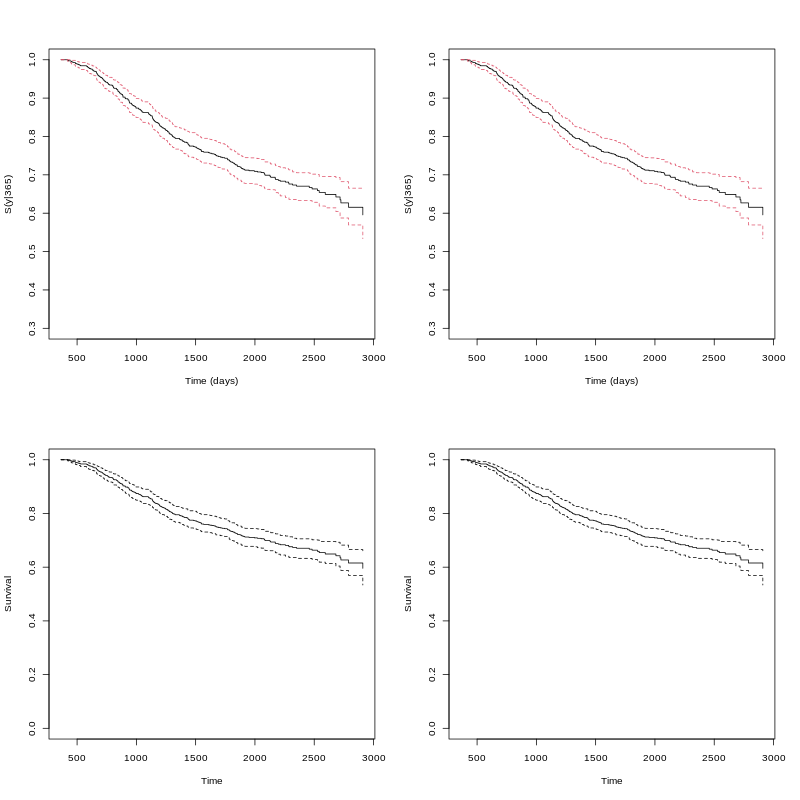

In [16]:
%%R -w 800 -h 800 -u px
par(mfrow = c(2, 2))
colon.ldm.1 <- survCOND(survCS(time1, event1, Stime, event) ~ 1, x = 365,
 data = colonCS, method = "LDM")
plot(colon.ldm.1, col = 1, confcol = 2, xlab = "Time (days)", ylab = "S(y|365)",
  ylim = c(0.3, 1))
colon.pldm.1 <- survCOND(survCS(time1, event1, Stime, event) ~ 1, x = 365,
  data = colonCS, method = "LDM", presmooth = TRUE)
plot(colon.ldm.1, col = 1, confcol = 2, xlab = "Time (days)", ylab = "S(y|365)",
  ylim = c(0.3, 1))
colon.ldm.2 <- survCOND(survCS(time1, event1, Stime, event) ~ 1, x = 1095,
  data = colonCS, method = "LDM")
plot(colon.ldm.1)
colon.pldm.2 <- survCOND(survCS(time1, event1, Stime, event) ~ 1, x = 1095,
  data = colonCS, method = "LDM", presmooth = TRUE)
plot(colon.ldm.1)

When comparing the results from the two methods, LDM and PLDM, it is evident that the semiparametric estimator, PLDM, exhibits less variability, particularly at the right tail where it has more jump points. Additionally, the semiparametric estimator tends to yield higher values at the right tail. This is because the PLDM method employs a smoothing technique that reduces the variability in the estimates, resulting in a more continuous and refined estimate of the conditional survival probabilities over time. This smoothing process helps to produce a more accurate representation of the survival trends, making it easier to interpret the results and draw meaningful conclusions from the data.

### Conditional Survival Probabilities with Covariates

The `survCOND()` function can also be used to estimate conditional survival probabilities with covariates. This allows you to assess how different factors influence the survival outcomes of patients over time. By including covariates in the analysis, you can identify the key predictors that impact patient prognosis and tailor treatment strategies accordingly. The conditional survival probabilities can be estimated based on the covariate values, providing valuable insights into the relationship between the covariates and survival outcomes.

#### Conditional Survival Probabilities with Treatment Covariate (`rx`)

The current version of the {condSURV} package allows for the inclusion of a single covariate. The following input commands provide estimates of the conditional survival function $S(y | x) = P(T > y | T_1 > x)$ for the three treatment groups by incorporating the covariate (`rx`) on the right-hand side of the formula argument:

In [17]:
%%R
colon.rx.ldm <- survCOND(survCS(time1, event1, Stime, event) ~ rx,
                         x = 365,
                         data = colonCS,
                         method = "LDM")
summary(colon.rx.ldm, times = 365 * 1:6)

    rx = Obs 
    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9469212    0.9169480    0.9725662
 1095 0.8672736    0.8240595    0.8995649
 1460 0.7655017    0.7162151    0.8178623
 1825 0.7123480    0.6562263    0.7685700
 2190 0.6562687    0.5956060    0.7193032

    rx = Lev 
    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9411765    0.9137892    0.9680402
 1095 0.8280543    0.7797524    0.8785421
 1460 0.7375566    0.6695665    0.7964706
 1825 0.7102667    0.6390013    0.7700467
 2190 0.6704293    0.6041240    0.7267357

    rx = Lev+5FU 
    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9442231    0.9112707    0.9722384
 1095 0.8884462    0.8488861    0.9297573
 1460 0.8165244    0.7670171    0.8622294
 1825 0.7639544    0.7092288    0.8176257
 2190 0.7314409    0.6698974    0.7846168



The results show that the estimated conditional survival probabilities for the three treatment groups (Obs, Lev, Lev+5-FU) from one year ato six years. The confidence intervals for these estimates are also provided, allowing for a more comprehensive interpretation of the results. By including covariates in the analysis, researchers can gain valuable insights into how different factors influence patient survival outcomes and tailor treatment strategies accordingly.

We can plot the estimated conditional survival probabilities for the three treatment groups using the `plot()` function.

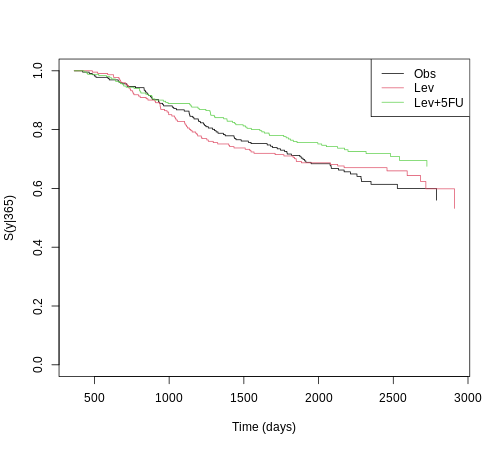

In [18]:
%%R -w 500 -h 450 -u px
 plot(colon.rx.ldm,
      xlab = "Time (days)",
      ylab = "S(y|365)", conf = FALSE)

#### Conditional Survival Probabilities for Male and Female Patients

We one can obtain the corresponding survival probabilities $S(y | x) = P(T > y|T_1 ≤ x)$ forboth genders (1 – male). Since this variable in the data.frame colonCS is of class "integer" it must be included in the formula using function factor..

In [19]:
%%R
colon.sex.ldm <- survCOND(survCS(time1, event1, Stime, event) ~ factor(sex),
                          x = 365,
                          data = colonCS, method = "LDM")
summary(colon.sex.ldm, times = 365 * 1:6)

    factor(sex) = 0 
    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9569231    0.9341484    0.9755533
 1095 0.8769231    0.8417339    0.9085529
 1460 0.7876565    0.7453274    0.8264345
 1825 0.7475015    0.6963559    0.7883385
 2190 0.6940773    0.6403759    0.7406388

    factor(sex) = 1 
    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9329893    0.9115717    0.9593632
 1095 0.8498782    0.8162112    0.8837580
 1460 0.7639861    0.7214863    0.8025647
 1825 0.7152471    0.6698563    0.7561516
 2190 0.6822945    0.6329177    0.7223319




#### Plotting Marginal Survival Curves

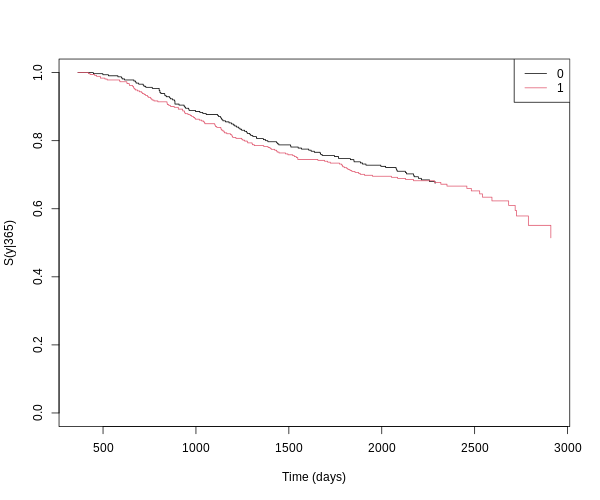

In [20]:
%%R -h 500 -w 600 -u px
 plot(colon.sex.ldm,
      xlab = "Time (days)",
      ylab = "S(y|365)", conf = FALSE)

#### Conditional Survival Probabilities with Age Covariate

The {condSURV} package enables users to estimate conditional survival based on a continuous covariate, which can be of class "integer" or "numeric". For instance, the estimates and plots for conditional survival can be computed for individuals aged 48 years, represented as $S(y|x, Z = z) = P(T > y | T_1 > x, age = 48)$.

In [21]:
%%R
colon.ipcw.age <- survCOND(survCS(time1, event1, Stime, event) ~ age,
                             x = 365,
                             z.value = 48,
                             data = colonCS,
                             lower.tail = FALSE)
 summary(colon.ipcw.age, times = 365 * 1:7)

    y  estimate lower 95% CI upper 95% CI
  365 1.0000000    1.0000000    1.0000000
  730 0.9582900    0.9086672    0.9939365
 1095 0.8994077    0.8420146    0.9501387
 1460 0.8069071    0.7311283    0.8931517
 1825 0.7490154    0.6526834    0.8356264
 2190 0.7211058    0.6374155    0.8108205
 2555 0.6860070    0.5729589    0.7830038


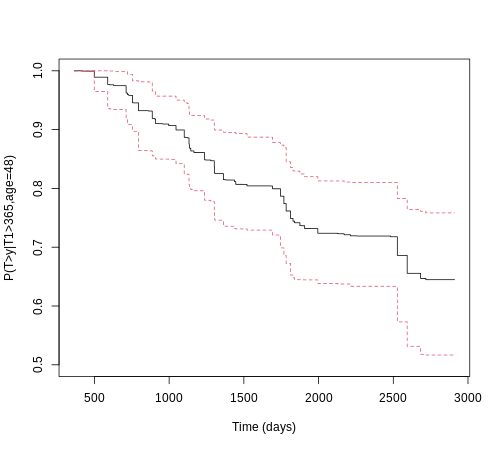

In [22]:
%%R -w 500 -h 450 -u px
plot(colon.ipcw.age, col = 1, confcol = 2, xlab = "Time (days)",
     ylab = "P(T>y|T1>365,age=48)", ylim = c(0.5, 1))

## Summary and Conclusions


This tutorial has provided an overview of conditional survival analysis for ordered multivariate failure time data using the {condSURV} package in R. We have demonstrated how to estimate the conditional survival function for ordered multivariate failure time data and how to interpret the results. By analyzing the conditional survival probabilities, researchers can gain valuable insights into the prognosis of patients who have undergone surgery for cancer and identify those individuals who have a higher likelihood of surviving their illness over time. This information can be used to guide clinical decision-making and tailor personalized care plans for patients, ultimately improving survival outcomes.

## References

1.  [`condSURV`: An R Package for the Estimation of the Conditional Survival Function for Ordered Multivariate Failure Time Data](https://journal.r-project.org/archive/2016-2/meiramachado-sestelo.pdf)

2.  [Chapter 4 Joint Models for Longitudinal and Time-to-Event Data](https://bookdown.org/sestelo/sa_financial/joint-models-for-longitudinal-and-time-to-event-data.html)

3.  [Conditional survival](https://www.pauldickman.com/software/stata/conditional-survival/)

4.  [`condsurv`](https://www.emilyzabor.com/condsurv/index.html)
